In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data=pd.read_csv("C:\\Users\\user\\Desktop\\Arya.ai\\training_set.csv")
train_data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


Perform EDA

In [3]:
train_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [4]:
train_data.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
3905,3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1
3909,3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,...,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717,1


To Find NAN Values

In [5]:
train_data.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
Y             0
dtype: int64

There is no NAN values

To find Columns of Train Data

In [6]:
train_data.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

In [7]:
train_data.describe

<bound method NDFrame.describe of       Unnamed: 0    X1    X2    X3     X4    X5    X6    X7    X8    X9  ...  \
0              0  0.00  0.00  4.34   0.00  0.00  0.00  0.00  0.00  0.00  ...   
1              1  0.00  0.56  0.56   0.00  1.12  0.56  2.25  0.00  0.00  ...   
2              2  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3              3  0.64  0.00  0.64   0.00  1.93  0.00  0.00  0.00  0.00  ...   
4              4  0.58  0.00  0.00  35.46  0.58  0.00  0.58  0.58  0.00  ...   
...          ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ...   
3905        3905  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3906        3906  0.00  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  ...   
3907        3907  0.12  0.00  0.12   0.00  0.00  0.25  0.00  0.00  0.00  ...   
3908        3908  0.00  0.00  0.00   0.00  0.00  0.00  0.00  3.12  0.00  ...   
3909        3909  0.96  0.00  0.48   0.00  0.00  0.96  0.00  0.00  0.48  ...   

     

In [8]:
train_data.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [9]:
train_data.shape

(3910, 59)

In [10]:
train_data.values

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 1.200e+01,
        0.000e+00],
       [1.000e+00, 0.000e+00, 5.600e-01, ..., 1.480e+02, 3.750e+02,
        1.000e+00],
       [2.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 5.000e+00,
        0.000e+00],
       ...,
       [3.907e+03, 1.200e-01, 0.000e+00, ..., 5.000e+00, 1.310e+02,
        0.000e+00],
       [3.908e+03, 0.000e+00, 0.000e+00, ..., 2.500e+01, 8.100e+01,
        1.000e+00],
       [3.909e+03, 9.600e-01, 0.000e+00, ..., 2.590e+02, 7.170e+02,
        1.000e+00]])

Delete The column 'unnamed: 0'

In [11]:
del train_data['Unnamed: 0']

In [12]:
train_data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'Y'],
      dtype='object')

x

In [13]:
X=train_data.drop(['Y'], axis=1)

In [14]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,...,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,...,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,...,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81


In [15]:
X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57'],
      dtype='object')

In [16]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207


In [17]:
X.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12
3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4
3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,0.0,...,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131
3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,0.0,...,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81
3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,0.0,...,0.0,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717


In [18]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,10.000000,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000


In [19]:
X.values

array([[0.0000e+00, 0.0000e+00, 4.3400e+00, ..., 1.2000e+00, 2.0000e+00,
        1.2000e+01],
       [0.0000e+00, 5.6000e-01, 5.6000e-01, ..., 1.6304e+01, 1.4800e+02,
        3.7500e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        5.0000e+00],
       ...,
       [1.2000e-01, 0.0000e+00, 1.2000e-01, ..., 1.2470e+00, 5.0000e+00,
        1.3100e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 3.8570e+00, 2.5000e+01,
        8.1000e+01],
       [9.6000e-01, 0.0000e+00, 4.8000e-01, ..., 9.5600e+00, 2.5900e+02,
        7.1700e+02]])

In [20]:
X.shape

(3910, 57)

To find the maximum values of features(X)

In [21]:
X.max()

X1         4.340
X2        14.280
X3         4.540
X4        42.810
X5         9.090
X6         3.570
X7         7.270
X8        11.110
X9         3.230
X10       18.180
X11        2.610
X12        9.670
X13        5.550
X14        5.550
X15        4.410
X16       20.000
X17        7.140
X18        7.690
X19       18.750
X20        6.320
X21       11.110
X22       17.100
X23        5.450
X24       12.500
X25       20.830
X26       16.660
X27       33.330
X28        9.090
X29       14.280
X30        5.880
X31       12.500
X32        4.760
X33       18.180
X34        4.760
X35       20.000
X36        7.690
X37        5.050
X38        8.330
X39       11.110
X40        4.760
X41        7.140
X42       14.280
X43        3.570
X44       20.000
X45       21.420
X46       22.050
X47        2.170
X48       10.000
X49        4.385
X50        9.752
X51        2.777
X52       32.478
X53        6.003
X54       19.829
X55     1102.500
X56     9989.000
X57    10062.000
dtype: float64

To find the minimum values of features(X)

In [22]:
X.min()

X1     0.0
X2     0.0
X3     0.0
X4     0.0
X5     0.0
X6     0.0
X7     0.0
X8     0.0
X9     0.0
X10    0.0
X11    0.0
X12    0.0
X13    0.0
X14    0.0
X15    0.0
X16    0.0
X17    0.0
X18    0.0
X19    0.0
X20    0.0
X21    0.0
X22    0.0
X23    0.0
X24    0.0
X25    0.0
X26    0.0
X27    0.0
X28    0.0
X29    0.0
X30    0.0
X31    0.0
X32    0.0
X33    0.0
X34    0.0
X35    0.0
X36    0.0
X37    0.0
X38    0.0
X39    0.0
X40    0.0
X41    0.0
X42    0.0
X43    0.0
X44    0.0
X45    0.0
X46    0.0
X47    0.0
X48    0.0
X49    0.0
X50    0.0
X51    0.0
X52    0.0
X53    0.0
X54    0.0
X55    1.0
X56    1.0
X57    1.0
dtype: float64

In [23]:
Y=train_data['Y']

In [24]:
Y

0       0
1       1
2       0
3       1
4       1
       ..
3905    0
3906    0
3907    0
3908    1
3909    1
Name: Y, Length: 3910, dtype: int64

In [25]:
Y.values

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

There is only 0 & 1 in Y

In [26]:
Y.unique()

array([0, 1], dtype=int64)

This is a binary classification

In [27]:
Y.shape

(3910,)

We want to split the Training Data, I split the training data in the format of 4:1

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [29]:
print(X_train)

       X1    X2    X3   X4    X5    X6    X7    X8   X9   X10  ...   X48  \
3015  0.0  0.41  0.41  0.0  2.06  0.00  1.65  0.82  0.0  0.00  ...  0.00   
3619  0.0  0.00  0.97  0.0  0.38  0.19  0.00  0.00  0.0  0.19  ...  0.00   
2175  0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.0  1.19  ...  0.00   
2645  0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.0  0.00  ...  0.00   
3087  0.0  0.00  0.40  0.0  0.00  0.00  0.00  0.00  0.4  0.40  ...  0.00   
...   ...   ...   ...  ...   ...   ...   ...   ...  ...   ...  ...   ...   
2118  0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.0  0.00  ...  0.00   
2354  0.0  0.00  1.25  0.0  2.50  0.00  0.00  0.00  0.0  0.00  ...  0.00   
577   0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.0  0.00  ...  1.72   
2124  0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.0  1.38  ...  0.00   
365   0.0  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.0  0.00  ...  0.00   

        X49    X50  X51    X52    X53  X54     X55  X56  X57  
3015  0.000  0.265  0.0 

In [30]:
print(X_test)

        X1   X2    X3   X4    X5   X6   X7    X8    X9  X10  ...  X48    X49  \
2455  0.00  0.0  0.00  0.0  0.00  0.0  0.0  0.00  0.00  0.0  ...  0.0  0.000   
2435  0.00  0.0  0.00  0.0  0.00  0.0  0.0  0.00  0.00  0.0  ...  0.0  0.000   
3611  0.00  0.0  0.37  0.0  0.37  0.0  0.0  0.00  0.00  0.0  ...  0.0  0.000   
1548  0.23  0.0  0.47  0.0  0.23  0.0  0.0  0.00  0.00  0.0  ...  0.0  0.043   
3345  0.00  0.0  0.00  0.0  0.00  0.0  0.0  0.00  0.00  0.0  ...  0.0  0.000   
...    ...  ...   ...  ...   ...  ...  ...   ...   ...  ...  ...  ...    ...   
937   0.00  0.0  0.00  0.0  0.00  0.0  0.0  0.00  0.00  0.0  ...  0.0  0.000   
2295  0.00  0.0  0.00  0.0  0.00  0.0  0.0  0.00  0.00  0.0  ...  0.0  0.000   
715   0.00  0.0  0.00  0.0  0.00  0.0  0.0  0.00  0.00  0.0  ...  0.0  0.000   
2011  0.00  0.0  0.32  0.0  0.00  0.0  0.0  0.00  0.00  0.0  ...  0.0  0.055   
3164  0.00  0.0  1.16  0.0  3.48  0.0  0.0  0.58  0.58  0.0  ...  0.0  0.000   

        X50  X51    X52    X53    X54  

In [31]:
print(Y_train)

3015    1
3619    1
2175    0
2645    0
3087    0
       ..
2118    1
2354    1
577     0
2124    0
365     0
Name: Y, Length: 3128, dtype: int64


In [32]:
print(Y_test)

2455    0
2435    0
3611    0
1548    1
3345    0
       ..
937     0
2295    0
715     0
2011    0
3164    1
Name: Y, Length: 782, dtype: int64


Visualization of Y

In [33]:
labels=Y.unique()
count=Y.value_counts()

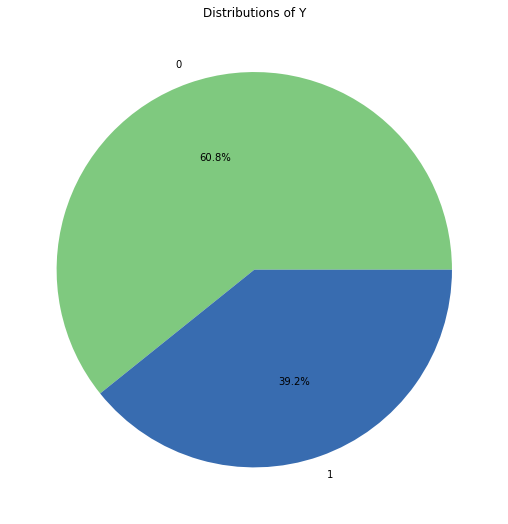

In [91]:
plt.figure(figsize=(20,20))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of Y')
pie=plt.pie(count,labels=labels,autopct='%1.1f%%',colors=colors)

By using Logistic Regression

In [35]:
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
prediction_logistic=classifier.predict(X_test)

Predicted Values by using Logistic Regression

In [37]:
print("Preddicted values by using Logistic Regression",prediction_logistic)

Preddicted values by using Logistic Regression [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1
 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1
 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 

Accuracy of Training Data by using Logistic Regression

In [38]:
print('Accuracy of Training data by using Logistic Regression: {:.2f}'.format(classifier.score(X_train,Y_train)))

Accuracy of Training data by using Logistic Regression: 0.92


Accuracy of Testing Data by using Logistic Regression

In [39]:
print('Accuracy of Testing Data by using Logistic Regression: {:.2f}'.format(classifier.score(X_test,Y_test)))

Accuracy of Testing Data by using Logistic Regression: 0.93


Classification Report of Logistic Regression

In [40]:
print(classification_report(Y_test,prediction_logistic))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       484
           1       0.91      0.90      0.90       298

    accuracy                           0.93       782
   macro avg       0.92      0.92      0.92       782
weighted avg       0.93      0.93      0.93       782



The test Accuracy of Logistic Regression is 0.92 

By using SVM(Support Vector Machine)

In [41]:
SVMclassifier=svm.SVC()
SVMclassifier.fit(X_train,Y_train)

SVC()

Predicted Values by using SVM(Support Vector Machine)

In [42]:
SVM_prediction=SVMclassifier.predict(X_test)

In [43]:
print("predicted values by using SVM",SVM_prediction)

predicted values by using SVM [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1

Accuracy of Training Data by using SVM

In [44]:
print('Accuracy of training data by using SVM: {:.2f}'.format(SVMclassifier.score(X_train,Y_train)))

Accuracy of training data by using SVM: 0.71


Accuracy of Testing Data by using SVM

In [45]:
print('Accuracy of testing data by using SVM: {:.2f}'.format(SVMclassifier.score(X_test,Y_test)))

Accuracy of testing data by using SVM: 0.70


Classification Report of SVM

In [46]:
print(classification_report(Y_test,SVM_prediction))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       484
           1       0.66      0.41      0.51       298

    accuracy                           0.70       782
   macro avg       0.68      0.64      0.64       782
weighted avg       0.69      0.70      0.68       782



The test Accuracy of SVM is 0.72

By using Random Forest Classification

In [47]:
random_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
random_classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [48]:
random_prediction=random_classifier.predict(X_test)

In [49]:
print("predicted values by using Random Forest Classification",random_prediction)

predicted values by using Random Forest Classification [0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1
 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1
 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 

Accuracy of Training Data by using Random Forest Classification

In [50]:
print('Accuracy of Training data by using Random Forest Classifier: {:.2f}'.format(random_classifier.score(X_train,Y_train)))

Accuracy of Training data by using Random Forest Classifier: 1.00


Accuracy of Testing Data by using Random Forest Classification

In [51]:
print('Accuracy of testing data by using Random Forest Classifier: {:.2f}'.format(random_classifier.score(X_test,Y_test)))

Accuracy of testing data by using Random Forest Classifier: 0.96


Classification Report of Random Forest Classification

In [52]:
print(classification_report(Y_test,random_prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       484
           1       0.96      0.93      0.95       298

    accuracy                           0.96       782
   macro avg       0.96      0.95      0.96       782
weighted avg       0.96      0.96      0.96       782



The test Accuracy of Random Forest Classification is 0.96

From these models we can understand the Random Forest classification model have good Accuracy. The test Accuracy of the model is 0.96

Created a Data Frame which include all predicted values of Logistic Regression model, SVM model, Random Forest Classification model and compare these predicted values with true value(Ytest)

In [53]:
Y_true=Y_test
Predicted_data={'True value' : Y_true,
                'predicted values by using Random Forest Classifier': random_prediction,
         'predicted values by using Logistic Regression': prediction_logistic,
               'predicted values by using SVM': SVM_prediction,}
Predicted_data=pd.DataFrame(Predicted_data)
Predicted_data

,True value,predicted values by using Random Forest Classifier,predicted values by using Logistic Regression,predicted values by using SVM
2455,0,0,0,0
2435,0,0,0,0
3611,0,0,0,0
1548,1,1,0,0
3345,0,0,0,0
...,...,...,...,...
937,0,0,0,0
2295,0,0,0,0
715,0,0,0,0
2011,0,0,0,0


In [54]:
Predicted_data.head()

,True value,predicted values by using Random Forest Classifier,predicted values by using Logistic Regression,predicted values by using SVM
2455,0,0,0,0
2435,0,0,0,0
3611,0,0,0,0
1548,1,1,0,0
3345,0,0,0,0


In [55]:
Predicted_data.tail()

,True value,predicted values by using Random Forest Classifier,predicted values by using Logistic Regression,predicted values by using SVM
937,0,0,0,0
2295,0,0,0,0
715,0,0,0,0
2011,0,0,0,0
3164,1,1,1,0


In [56]:
Predicted_data[:60]

,True value,predicted values by using Random Forest Classifier,predicted values by using Logistic Regression,predicted values by using SVM
2455,0,0,0,0
2435,0,0,0,0
3611,0,0,0,0
1548,1,1,0,0
3345,0,0,0,0
2186,0,0,0,0
743,0,0,0,0
3485,1,1,1,0
2073,0,0,0,0
1953,0,0,0,1


In [89]:
labels_SVM=Predicted_data['predicted values by using SVM'].unique()
count_SVM=Predicted_data['predicted values by using SVM'].value_counts()

labels_logistic=Predicted_data['predicted values by using Logistic Regression'].unique()
count_logistic=Predicted_data['predicted values by using Logistic Regression'].value_counts()

labels_random=Predicted_data['predicted values by using Random Forest Classifier'].unique()
count_random=Predicted_data['predicted values by using Random Forest Classifier'].value_counts()

Accuracy of testing data by using Random Forest Classifier: 0.96
Accuracy of Testing Data by using Logistic Regression: 0.93
Accuracy of testing data by using SVM: 0.70


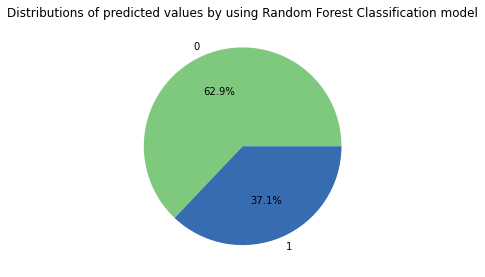

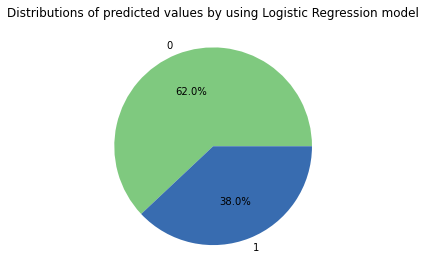

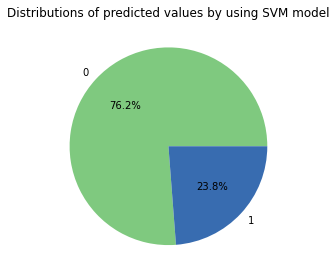

In [95]:
# Random Forest Classification model
print('Accuracy of testing data by using Random Forest Classifier: {:.2f}'.format(random_classifier.score(X_test,Y_test)))

plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using Random Forest Classification model')
pie=plt.pie(count_random,labels=labels_random,autopct='%1.1f%%',colors=colors)


#Logistic Regression model

plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using Logistic Regression model')
pie=plt.pie(count_logistic,labels=labels_logistic,autopct='%1.1f%%',colors=colors)
print('Accuracy of Testing Data by using Logistic Regression: {:.2f}'.format(classifier.score(X_test,Y_test)))

# SVM model

plt.figure(figsize=(10,10))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using SVM model')
pie=plt.pie(count_SVM,labels=labels_logistic,autopct='%1.1f%%',colors=colors)
print('Accuracy of testing data by using SVM: {:.2f}'.format(SVMclassifier.score(X_test,Y_test)))

So the best model is by using Random Forest Classifier. So Random Forest Classification model is perfect model

Visualize the predicted values of Random Forest Classification model

In [59]:
labels_random=Predicted_data['predicted values by using Random Forest Classifier'].unique()
count_random=Predicted_data['predicted values by using Random Forest Classifier'].value_counts()

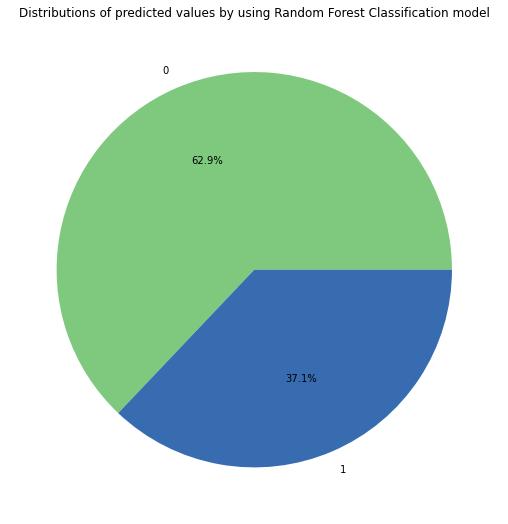

In [92]:
plt.figure(figsize=(20,20))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distributions of predicted values by using Random Forest Classification model')
pie=plt.pie(count_random,labels=labels_random,autopct='%1.1f%%',colors=colors)

Call Test Data

In [61]:
test_data=pd.read_csv("C:\\Users\\user\\Desktop\\Arya.ai\\test_set.csv")
test_data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.00,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.00,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.00,0.000,0.388,0.000,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.30,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.00,0.000,0.065,0.000,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.20,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.00,0.000,0.110,0.000,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.00,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.00,0.000,0.364,0.000,0.729,0.121,0.000,7.781,32,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,686,0.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.25,...,0.00,0.301,0.473,0.043,0.043,0.000,0.000,2.111,17,190
687,687,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,2.56,0.000,0.000,0.000,0.375,0.000,0.000,2.250,7,36
688,688,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,2.333,5,7
689,689,0.08,0.08,0.57,0.0,0.48,0.00,0.00,0.08,0.00,...,0.08,0.011,0.034,0.000,0.057,0.022,0.000,1.875,65,542


In [62]:
test_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [63]:
test_data.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
686,686,0.25,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.25,...,0.00,0.301,0.473,0.043,0.043,0.000,0.0,2.111,17,190
687,687,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,2.56,0.000,0.000,0.000,0.375,0.000,0.0,2.250,7,36
688,688,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,2.333,5,7
689,689,0.08,0.08,0.57,0.0,0.48,0.0,0.0,0.08,0.00,...,0.08,0.011,0.034,0.000,0.057,0.022,0.0,1.875,65,542
690,690,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.0,2.000,4,16


To Find NAN Values

In [64]:
test_data.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
dtype: int64

In test data there is no NAN values

In [65]:
test_data.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,...,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,345.000000,0.113401,0.250333,0.259363,0.084385,0.317395,0.095485,0.124891,0.101071,0.083965,...,0.023878,0.044698,0.137774,0.023201,0.247001,0.064440,0.046559,6.008399,51.237337,284.591896
std,199.618803,0.352256,1.481908,0.502791,1.533871,0.758769,0.335553,0.402284,0.414537,0.316430,...,0.169886,0.286601,0.234006,0.200352,0.508129,0.169546,0.258931,33.560544,128.150540,745.764420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,172.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000
50%,345.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000
75%,517.500000,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.189000,0.000000,0.307500,0.038000,0.000000,3.676500,46.000000,271.500000
max,690.000000,4.540000,14.280000,5.100000,35.460000,10.000000,5.880000,5.400000,4.620000,5.260000,...,2.560000,4.121000,2.941000,4.081000,5.803000,1.357000,3.879000,664.000000,1327.000000,15841.000000


In [66]:
test_data.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29',
       'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49',
       'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57'],
      dtype='object')

In [67]:
test_data.values

array([[0.0000e+00, 7.0000e-01, 0.0000e+00, ..., 2.3420e+00, 4.7000e+01,
        8.9000e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0375e+01, 1.6800e+02,
        2.4900e+02],
       [2.0000e+00, 4.6000e-01, 3.0000e-01, ..., 5.8910e+00, 1.9300e+02,
        3.0400e+03],
       ...,
       [6.8800e+02, 0.0000e+00, 0.0000e+00, ..., 2.3330e+00, 5.0000e+00,
        7.0000e+00],
       [6.8900e+02, 8.0000e-02, 8.0000e-02, ..., 1.8750e+00, 6.5000e+01,
        5.4200e+02],
       [6.9000e+02, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 4.0000e+00,
        1.6000e+01]])

In [68]:
test_data.shape

(691, 58)

Delete The column 'unnamed: 0'

In [69]:
test_data=test_data.drop(['Unnamed: 0'],axis=1)

In [70]:
test_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.00,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.105,0.000,0.000,2.342,47,89
1,0.00,0.00,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.00,0.000,0.388,0.000,0.776,0.129,0.000,10.375,168,249
2,0.46,0.30,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.00,0.000,0.065,0.000,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.20,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.00,0.000,0.110,0.000,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.00,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.00,0.000,0.364,0.000,0.729,0.121,0.000,7.781,32,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,0.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.00,...,0.00,0.301,0.473,0.043,0.043,0.000,0.000,2.111,17,190
687,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,2.56,0.000,0.000,0.000,0.375,0.000,0.000,2.250,7,36
688,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,2.333,5,7
689,0.08,0.08,0.57,0.0,0.48,0.00,0.00,0.08,0.00,0.00,...,0.08,0.011,0.034,0.000,0.057,0.022,0.000,1.875,65,542


In [71]:
test_data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57'],
      dtype='object')

The best model is Random Forest Classification model. So we want to use this model for predicting test data

In [72]:
model_prediction=random_classifier.predict(test_data)

In [73]:
print("Predicted Values",model_prediction)

Predicted Values [0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1
 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0
 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 0 0

Create a Data Frame of Predicted Values 

In [74]:
model_prediction=model_prediction
model_data={'model_predicted Y' : model_prediction,
         }
model_data=pd.DataFrame(model_data)
model_data

,model_predicted Y
0,0
1,1
2,1
3,1
4,1
...,...
686,0
687,0
688,0
689,0


Data Frame of Predicted Value

Visualize the predicted values 

In [75]:
labels_model=model_data['model_predicted Y'].unique()
count_model=model_data['model_predicted Y'].value_counts()

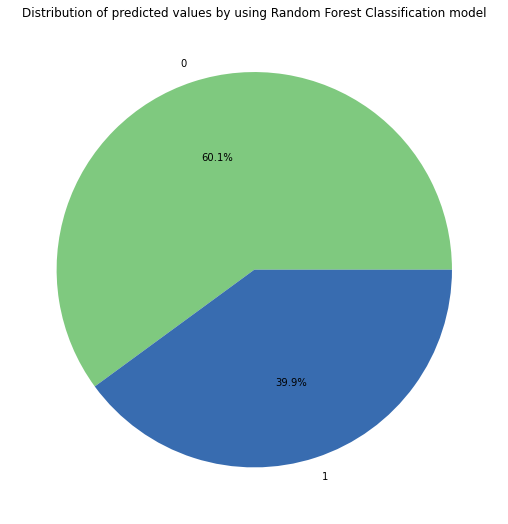

In [97]:
plt.figure(figsize=(20,20))
from matplotlib.gridspec import GridSpec
grid=GridSpec(2,2)
cmap=plt.get_cmap('Accent')
colors=[cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(grid[0,1],aspect=1,title='Distribution of predicted values by using Random Forest Classification model')
pie=plt.pie(count_model,labels=labels_model,autopct='%1.1f%%',colors=colors)

Combine our Test Data and model data, and to make a single Data Frame

In [77]:
Model_Datas=[test_data,model_data]
Result_model_data=pd.concat(Model_Datas,axis=1,join='inner')

In [78]:
Result_model_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,model_predicted Y
0,0.70,0.00,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.00,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.000,0.388,0.000,0.776,0.129,0.000,10.375,168,249,1
2,0.46,0.30,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.000,0.065,0.000,0.325,0.756,0.153,5.891,193,3040,1
3,0.10,0.20,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.000,0.110,0.000,0.490,0.158,0.015,8.550,669,1351,1
4,0.00,0.00,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.000,0.364,0.000,0.729,0.121,0.000,7.781,32,249,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,0.25,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.00,...,0.301,0.473,0.043,0.043,0.000,0.000,2.111,17,190,0
687,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.375,0.000,0.000,2.250,7,36,0
688,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,2.333,5,7,0
689,0.08,0.08,0.57,0.0,0.48,0.00,0.00,0.08,0.00,0.00,...,0.011,0.034,0.000,0.057,0.022,0.000,1.875,65,542,0


The Final out put

In [79]:
Result_model_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,model_predicted Y
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249,1
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040,1
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351,1
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249,1


In [80]:
Result_model_data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,model_predicted Y
686,0.25,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.25,0.0,...,0.301,0.473,0.043,0.043,0.000,0.0,2.111,17,190,0
687,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.000,0.000,0.000,0.375,0.000,0.0,2.250,7,36,0
688,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,2.333,5,7,0
689,0.08,0.08,0.57,0.0,0.48,0.0,0.0,0.08,0.00,0.0,...,0.011,0.034,0.000,0.057,0.022,0.0,1.875,65,542,0
690,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,2.000,4,16,0


In [81]:
Result_model_data[:60]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,model_predicted Y
0,0.70,0.00,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.105,0.000,0.000,2.342,47,89,0
1,0.00,0.00,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.000,0.388,0.000,0.776,0.129,0.000,10.375,168,249,1
2,0.46,0.30,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.000,0.065,0.000,0.325,0.756,0.153,5.891,193,3040,1
3,0.10,0.20,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.000,0.110,0.000,0.490,0.158,0.015,8.550,669,1351,1
4,0.00,0.00,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.000,0.364,0.000,0.729,0.121,0.000,7.781,32,249,1
5,0.00,0.00,1.49,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,1.069,0.000,0.000,1.000,1,13,0
6,0.33,0.84,0.67,0.0,0.67,0.33,0.67,0.00,0.33,0.00,...,0.000,0.183,0.000,0.156,0.104,0.026,6.500,525,858,1
7,0.00,0.00,0.00,0.0,0.00,1.21,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,1.627,0.000,0.465,2.591,31,127,1
8,0.00,0.48,0.48,0.0,0.48,0.00,0.00,0.48,0.00,0.00,...,0.000,0.084,0.000,0.084,0.336,0.000,3.200,12,80,1
9,0.08,0.00,0.93,0.0,1.52,0.33,0.00,0.08,0.67,0.00,...,0.012,0.101,0.000,0.356,0.101,0.012,11.320,669,1834,1


To Find NAN Values

In [82]:
Result_model_data.isnull().sum()

X1                   0
X2                   0
X3                   0
X4                   0
X5                   0
X6                   0
X7                   0
X8                   0
X9                   0
X10                  0
X11                  0
X12                  0
X13                  0
X14                  0
X15                  0
X16                  0
X17                  0
X18                  0
X19                  0
X20                  0
X21                  0
X22                  0
X23                  0
X24                  0
X25                  0
X26                  0
X27                  0
X28                  0
X29                  0
X30                  0
X31                  0
X32                  0
X33                  0
X34                  0
X35                  0
X36                  0
X37                  0
X38                  0
X39                  0
X40                  0
X41                  0
X42                  0
X43                  0
X44        

There is no NAN values

In [83]:
Result_model_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,model_predicted Y
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,...,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.113401,0.250333,0.259363,0.084385,0.317395,0.095485,0.124891,0.101071,0.083965,0.211505,...,0.044698,0.137774,0.023201,0.247001,0.064440,0.046559,6.008399,51.237337,284.591896,0.399421
std,0.352256,1.481908,0.502791,1.533871,0.758769,0.335553,0.402284,0.414537,0.316430,0.499598,...,0.286601,0.234006,0.200352,0.508129,0.169546,0.258931,33.560544,128.150540,745.764420,0.490134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.606000,6.000000,34.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.055000,0.000000,0.004000,0.000000,0.000000,2.285000,15.000000,99.000000,0.000000
75%,0.000000,0.000000,0.360000,0.000000,0.375000,0.000000,0.000000,0.000000,0.000000,0.120000,...,0.000000,0.189000,0.000000,0.307500,0.038000,0.000000,3.676500,46.000000,271.500000,1.000000
max,4.540000,14.280000,5.100000,35.460000,10.000000,5.880000,5.400000,4.620000,5.260000,4.540000,...,4.121000,2.941000,4.081000,5.803000,1.357000,3.879000,664.000000,1327.000000,15841.000000,1.000000


In [84]:
Result_model_data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'model_predicted Y'],
      dtype='object')

In [85]:
Result_model_data.shape

(691, 58)

In [86]:
Result_model_data.values

array([[7.00e-01, 0.00e+00, 7.00e-01, ..., 4.70e+01, 8.90e+01, 0.00e+00],
       [0.00e+00, 0.00e+00, 8.40e-01, ..., 1.68e+02, 2.49e+02, 1.00e+00],
       [4.60e-01, 3.00e-01, 4.60e-01, ..., 1.93e+02, 3.04e+03, 1.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 5.00e+00, 7.00e+00, 0.00e+00],
       [8.00e-02, 8.00e-02, 5.70e-01, ..., 6.50e+01, 5.42e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 4.00e+00, 1.60e+01, 0.00e+00]])

To find the maximum values of features(X) 

In [87]:
Result_model_data.max()

X1                       4.540
X2                      14.280
X3                       5.100
X4                      35.460
X5                      10.000
X6                       5.880
X7                       5.400
X8                       4.620
X9                       5.260
X10                      4.540
X11                      2.000
X12                      6.250
X13                      2.630
X14                     10.000
X15                      2.860
X16                     16.660
X17                      5.060
X18                      9.090
X19                     14.280
X20                     18.180
X21                      8.000
X22                     15.430
X23                      3.620
X24                      9.090
X25                     10.000
X26                      8.330
X27                     33.330
X28                      4.760
X29                      6.150
X30                      4.760
X31                      4.760
X32                      4.760
X33     

To find the minimum values of features(X)

In [88]:
Result_model_data.min()

X1                   0.0
X2                   0.0
X3                   0.0
X4                   0.0
X5                   0.0
X6                   0.0
X7                   0.0
X8                   0.0
X9                   0.0
X10                  0.0
X11                  0.0
X12                  0.0
X13                  0.0
X14                  0.0
X15                  0.0
X16                  0.0
X17                  0.0
X18                  0.0
X19                  0.0
X20                  0.0
X21                  0.0
X22                  0.0
X23                  0.0
X24                  0.0
X25                  0.0
X26                  0.0
X27                  0.0
X28                  0.0
X29                  0.0
X30                  0.0
X31                  0.0
X32                  0.0
X33                  0.0
X34                  0.0
X35                  0.0
X36                  0.0
X37                  0.0
X38                  0.0
X39                  0.0
X40                  0.0
